## Notebook 1: Initial Exploratory Data Analysis (EDA)

This notebook performs the initial EDA on the raw `Clustering_Data.ftr` dataset. 


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pyarrow

# Setup
np.random.seed(42)

# Seaborn style
try:
    sns.set_theme(style="whitegrid")
except AttributeError:
    # Fallback for older Seaborn versions or if set_theme is not available
    try:
        sns.set()
    except Exception:
        plt.style.use('ggplot') # Matplotlib fallback

# Output directory
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

print("Setup complete.")

Setup complete.


### 1. Load Data
Load the `Clustering_Data.ftr` dataset.

In [7]:
data_path = 'Clustering_Data.ftr'


df_raw = pd.read_feather(data_path)
print(f"Dataset loaded successfully: {data_path}")
print(f"Shape of the dataset: {df_raw.shape}")


df = df_raw.copy() # Work with a copy

Dataset loaded successfully: Clustering_Data.ftr
Shape of the dataset: (3030, 18)


### 2. Initial Data Inspection

In [8]:
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
df.info()


print("\nSummary Statistics (Categorical):")
display(df.describe(include=['object', 'category']))

First 5 rows of the dataset:


,Customer_ID,Street,City,State_Code,Postal_Code,Country,Seasonality_Segment,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Propensity
0,Accoount 1,2295 BATTLEFORD RD,MISSISSAUGA,ON,L5N 2W8,CAN,None,None,None,None,None,None,None,None,Yes,High,High,-
1,Accoount 2,64 WESTBANK EXPY STE A,GRETNA,LA,70053,USA,None,None,None,None,None,None,None,None,-,Medium,Medium,-
2,Accoount 3,209-229 E Airline Hwy.,LaPlace,LA,70068,USA,None,None,None,None,None,None,None,None,-,Medium,Medium,-
3,Accoount 4,500 S MEADOWS PKWY,RENO,NV,89521,USA,None,None,None,None,None,None,None,None,Yes,High,High,-
4,Accoount 5,746 Victorian Avenue,Sparks,NV,89431,USA,None,None,None,None,None,None,None,None,Yes,High,High,-



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer_ID               3030 non-null   object
 1   Street                    3029 non-null   object
 2   City                      3030 non-null   object
 3   State_Code                2722 non-null   object
 4   Postal_Code               3030 non-null   object
 5   Country                   3030 non-null   object
 6   Seasonality_Segment       2282 non-null   object
 7   EA_Segment                2841 non-null   object
 8   Revenue_Bucket            3030 non-null   object
 9   Profit_Bucket             3030 non-null   object
 10  Market_Share_Segment      3030 non-null   object
 11  Casino_Size_Segment       3030 non-null   object
 12  Market_Potential_Segment  3030 non-null   object
 13  Churn_Segment             3030 non-null   object
 14  Competiti

,Customer_ID,Street,City,State_Code,Postal_Code,Country,Seasonality_Segment,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Propensity
count,3030,3029,3030,2722,3030,3030,2282,2841,3030,3030,3030,3030,3030,3030,3030,3030,2625,3030
unique,3030,2461,1245,60,1124,33,4,4,4,4,4,4,5,4,2,4,4,4
top,Accoount 1,No Address Found,LAS VEGAS,NV,None,USA,None,None,None,None,None,None,None,None,-,High,High,-
freq,1,220,351,781,421,2364,1579,2356,1954,1954,2138,2138,2138,2022,1591,1304,1368,2071


In [9]:
# Work with df_raw and create a copy df for consistency
df = df_raw.copy()
print(f"Shape of df_raw: {df_raw.shape}")


# Step 1: Define columns to analyze (exclude Customer_ID)
columns_to_analyze = [
    'Propensity', 'Seasonality_Segment', 'EA_Segment', 'Revenue_Bucket',
    'Profit_Bucket', 'Market_Share_Segment', 'Casino_Size_Segment',
    'Market_Potential_Segment', 'Churn_Segment', 'Competitiveness_Flag',
    'Volume_Segment', 'Density_Segment'
]

# Replace None, 'None', '-', NaN with 'Missing'
for col in columns_to_analyze:
    print(f"\nOriginal unique values in '{col}': {df[col].unique()}")
    df[col] = df[col].replace([None, 'None', '-', np.nan], 'Missing')
    print(f"Standardized unique values in '{col}': {df[col].unique()}")


# Step 2: Collect all unique values and their frequencies across columns
unique_value_frequencies = {}
for col in columns_to_analyze:
    value_counts = df[col].value_counts()
    print(f"\nFrequencies in {col}:")
    for value, count in value_counts.items():
        print(f"  {value}: {count}")
        if value in unique_value_frequencies:
            unique_value_frequencies[value] += count
        else:
            unique_value_frequencies[value] = count

# Step 3: Display the total occurrences of each unique value across all columns
print("\nTotal occurrences of each unique value across all columns:")
for value, total_count in sorted(unique_value_frequencies.items()):
    print(f"  {value}: {total_count}")


Shape of df_raw: (3030, 18)

Original unique values in 'Propensity': ['-' 'M' 'H' 'L']
Standardized unique values in 'Propensity': ['Missing' 'M' 'H' 'L']

Original unique values in 'Seasonality_Segment': ['None' None 'Highly Seasonal' 'Potentially Seasonal' 'Non Seasonal']
Standardized unique values in 'Seasonality_Segment': ['Missing' 'Highly Seasonal' 'Potentially Seasonal' 'Non Seasonal']

Original unique values in 'EA_Segment': ['None' None 'Early Adopter' 'Late Adopter' 'Trend Follower']
Standardized unique values in 'EA_Segment': ['Missing' 'Early Adopter' 'Late Adopter' 'Trend Follower']

Original unique values in 'Revenue_Bucket': ['None' 'L' 'M' 'H']
Standardized unique values in 'Revenue_Bucket': ['Missing' 'L' 'M' 'H']

Original unique values in 'Profit_Bucket': ['None' 'H' 'L' 'M']
Standardized unique values in 'Profit_Bucket': ['Missing' 'H' 'L' 'M']

Original unique values in 'Market_Share_Segment': ['None' 'L' 'M' 'H']
Standardized unique values in 'Market_Share_Segment

#### 3. Duplicate Rows

In [11]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("Showing some duplicate rows (if any):")
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

Number of duplicate rows: 0


#### 4. Inconsistent Categorical Values

Check unique values for a sample of categorical columns to spot inconsistencies (e.g., 'High' vs 'high').

In [12]:
potential_categorical_cols = [
    'Revenue_Bucket', 'Profit_Bucket', 'Churn_Segment', 'Market_Potential_Segment',
    'Seasonality_Segment', 'EA_Segment', 'Market_Share_Segment', 'Casino_Size_Segment',
    'Competitiveness_Flag', 'Volume_Segment', 'Density_Segment', 'Propensity'
]

actual_categorical_cols = [col for col in potential_categorical_cols if col in df.columns and df[col].dtype == 'object']

print("Unique values in categorical columns (sample):")
for col in actual_categorical_cols:
    unique_vals = df[col].unique()
    print(f"Column '{col}': {len(unique_vals)} unique values. Examples: {unique_vals[:10]}")
    # Check for mixed case or leading/trailing spaces by comparing original with standardized
    standardized_vals = df[col].astype(str).str.lower().str.strip().unique()
    if len(unique_vals) != len(standardized_vals):
        print(f"  Potential inconsistency in '{col}'. Original unique: {len(unique_vals)}, Standardized unique: {len(standardized_vals)}")
    if len(unique_vals) > 20: 
        print(f"Warning: Column '{col}' has a high number of unique values ({len(unique_vals)}). Consider if it's truly categorical or an ID-like field.")

Unique values in categorical columns (sample):
Column 'Revenue_Bucket': 4 unique values. Examples: ['Missing' 'L' 'M' 'H']
Column 'Profit_Bucket': 4 unique values. Examples: ['Missing' 'H' 'L' 'M']
Column 'Churn_Segment': 4 unique values. Examples: ['Missing' 'Minimal Change' 'Encouraging' 'Concerning']
Column 'Market_Potential_Segment': 5 unique values. Examples: ['Missing' 'M' 'H' 'L' 'VH']
Column 'Seasonality_Segment': 4 unique values. Examples: ['Missing' 'Highly Seasonal' 'Potentially Seasonal' 'Non Seasonal']
Column 'EA_Segment': 4 unique values. Examples: ['Missing' 'Early Adopter' 'Late Adopter' 'Trend Follower']
Column 'Market_Share_Segment': 4 unique values. Examples: ['Missing' 'L' 'M' 'H']
Column 'Casino_Size_Segment': 4 unique values. Examples: ['Missing' 'L' 'M' 'H']
Column 'Competitiveness_Flag': 2 unique values. Examples: ['Yes' 'Missing']
Column 'Volume_Segment': 4 unique values. Examples: ['High' 'Medium' 'Missing' 'Low']
Column 'Density_Segment': 4 unique values. Exa

### 5. Cramér's V Heatmap Analysis

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_8940\3202626073.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_8940\3202626073.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_8940\3202626073.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_8940\3202626073.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_8940\3202626073.py:14: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\Achintye Kamra\AppData\Local\Temp\ipyk

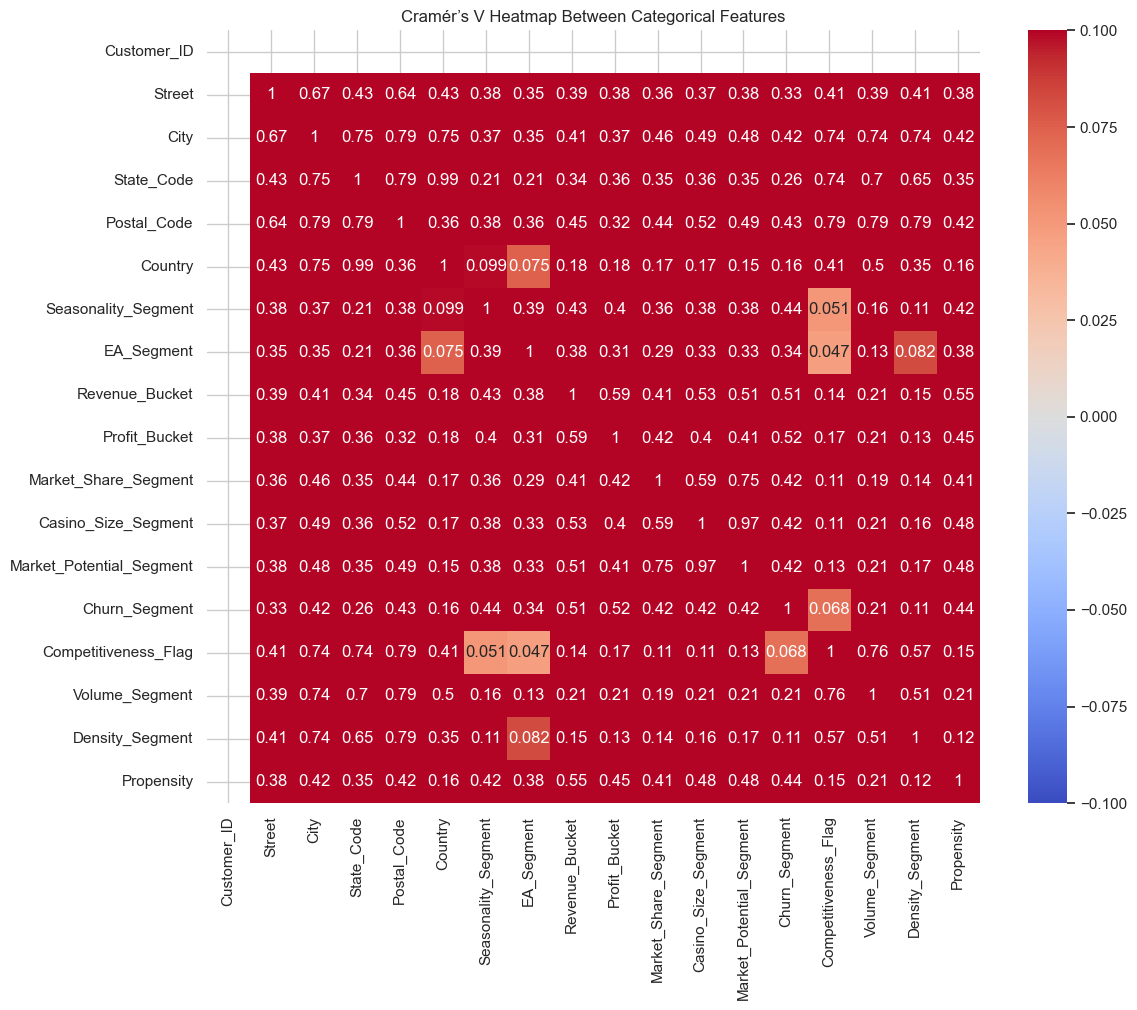

In [21]:
# Cramér's V Heatmap (for redundancy between categorical vars)
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = [col for col in df.columns if df[col].dtype == 'object']

cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(12,10))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', square=True)
plt.title('Cramér’s V Heatmap Between Categorical Features')
plt.tight_layout()
plt.show()

In [22]:
# Extract pairs with Cramér's V > 0.8, excluding 'Customer_ID'
high_corr_pairs = []

# Get columns, excluding 'Customer_ID'
columns = [col for col in cramers_results.columns if col != 'Customer_ID']

for col1 in columns:
    for col2 in columns:
        if col1 != col2 and cramers_results.loc[col1, col2] > 0.8:
            pair = tuple(sorted([col1, col2]))
            if pair not in high_corr_pairs:
                high_corr_pairs.append(pair)

# Display highly correlated pairs
if high_corr_pairs:
    print("Highly correlated categorical feature pairs (Cramér’s V > 0.8):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} — {pair[1]} : {cramers_results.loc[pair[0], pair[1]]:.2f}")
else:
    print("No highly correlated pairs found.")

Highly correlated categorical feature pairs (Cramér’s V > 0.8):
Country — State_Code : 0.99
Casino_Size_Segment — Market_Potential_Segment : 0.97


#### Categorical Feature Distributions

In [25]:
# Calculate the percentage of 'Missing' values for each column
missing_percentage = (df.apply(lambda x: (x == 'Missing').sum()) / len(df)) * 100

# Sort the percentages in descending order
missing_percentage = missing_percentage.sort_values(ascending=False)

# Print the percentage of missing values
print("Percentage of 'Missing' values for each column:")
print(missing_percentage)

Percentage of 'Missing' values for each column:
EA_Segment                  83.993399
Seasonality_Segment         76.798680
Market_Potential_Segment    70.561056
Casino_Size_Segment         70.561056
Market_Share_Segment        70.561056
Propensity                  68.349835
Churn_Segment               66.732673
Revenue_Bucket              64.488449
Profit_Bucket               64.488449
Competitiveness_Flag        52.508251
Density_Segment             33.927393
Volume_Segment              20.561056
Street                       0.000000
Country                      0.000000
Postal_Code                  0.000000
State_Code                   0.000000
City                         0.000000
Customer_ID                  0.000000
dtype: float64


Distributions of Categorical Features:


C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


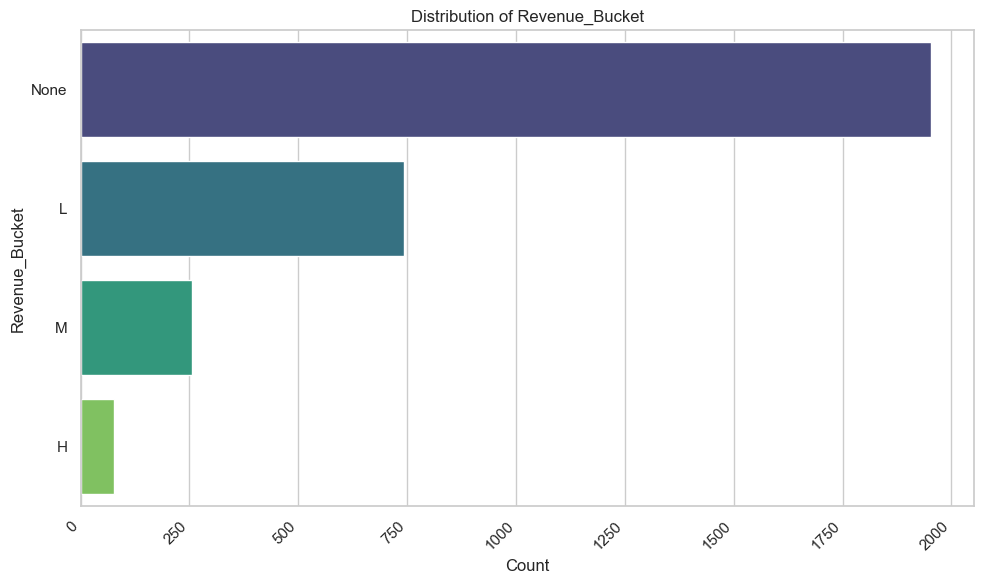

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


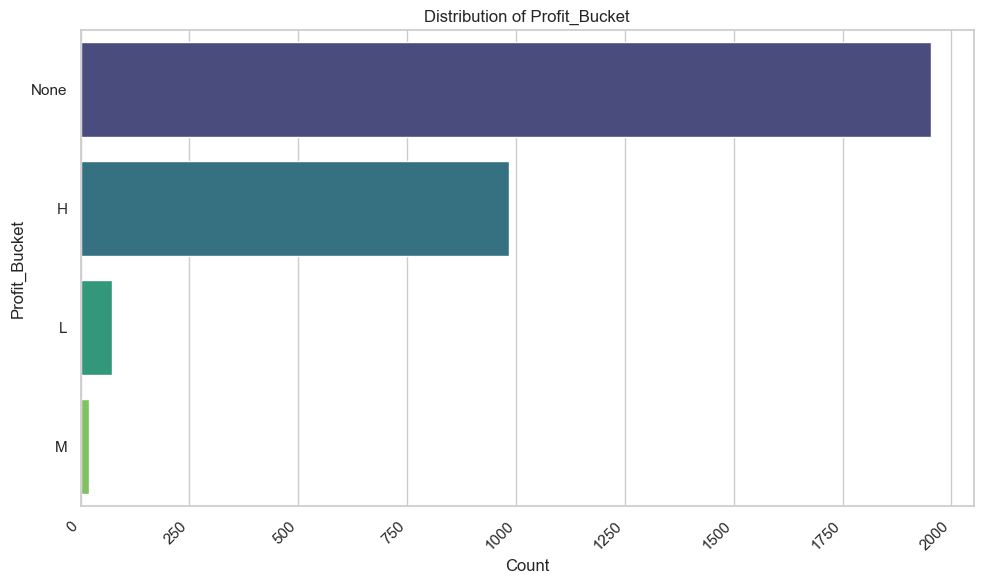

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


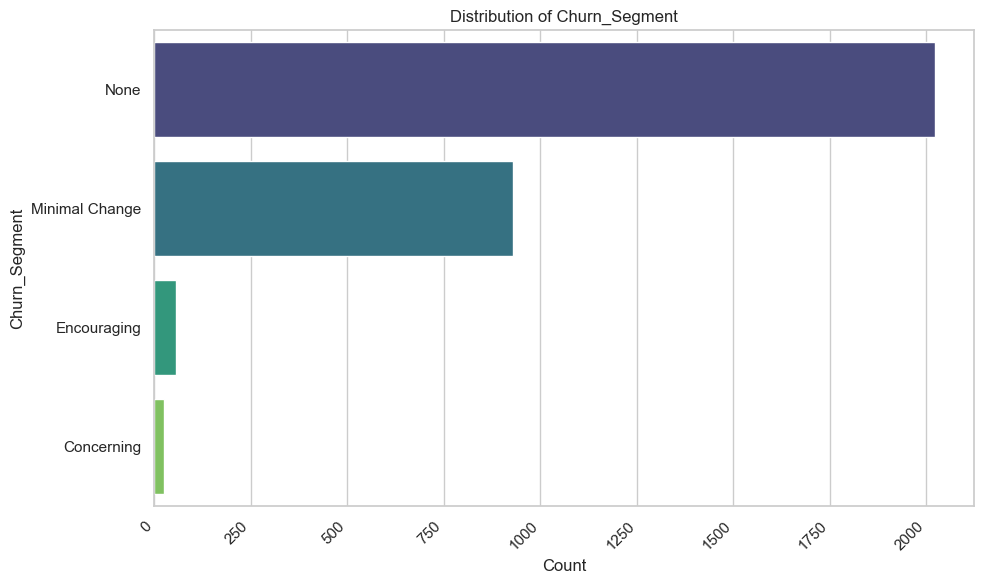

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


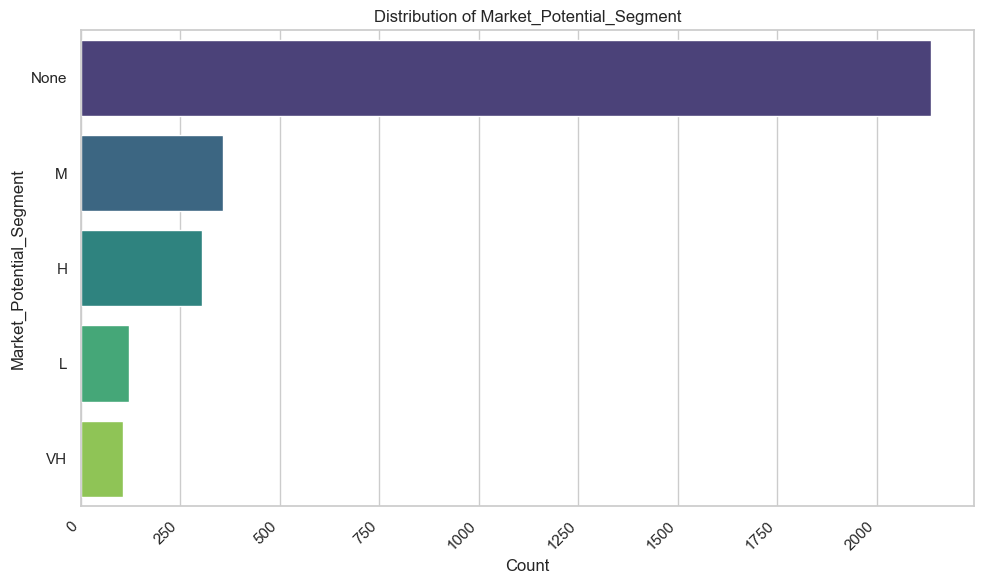

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


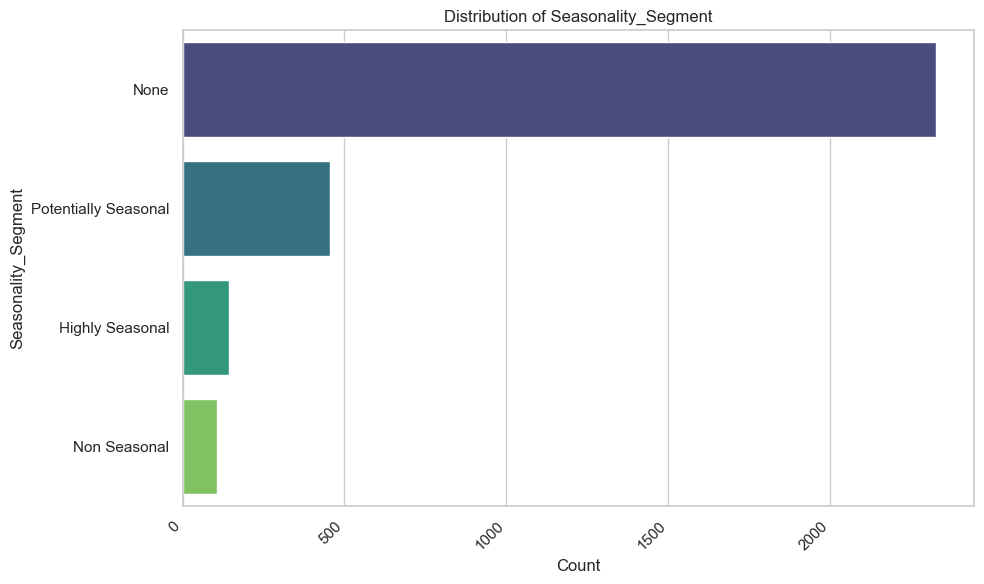

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


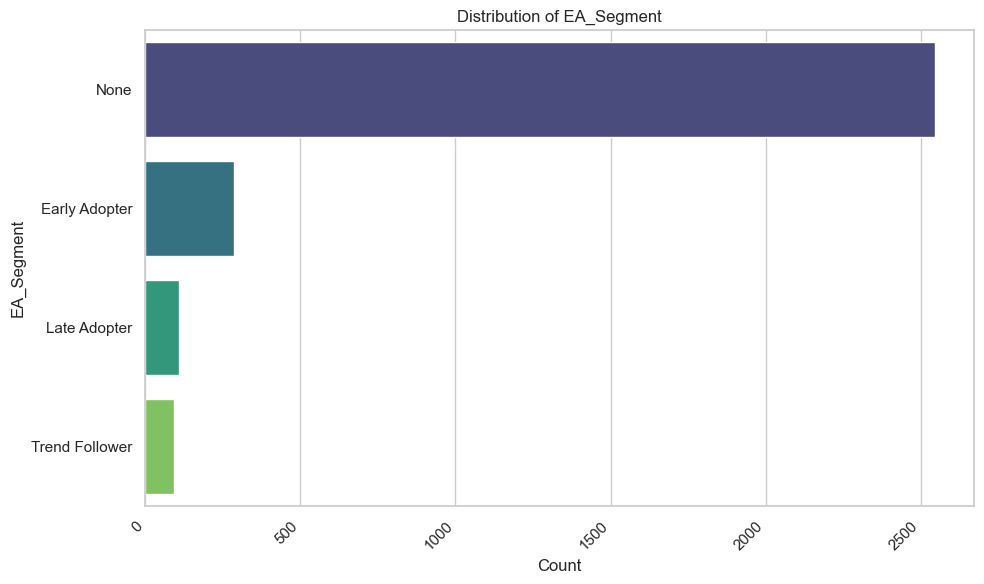

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


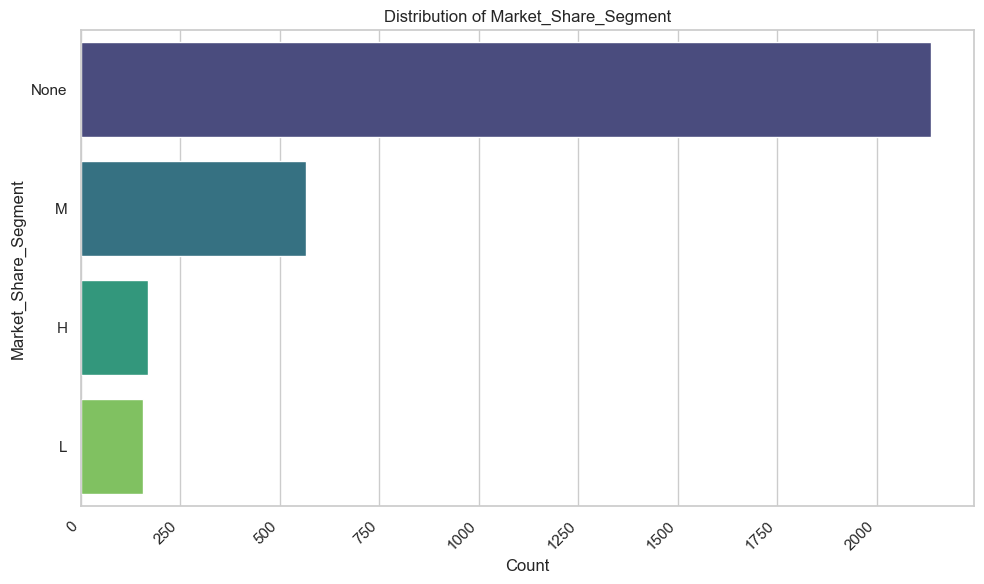

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


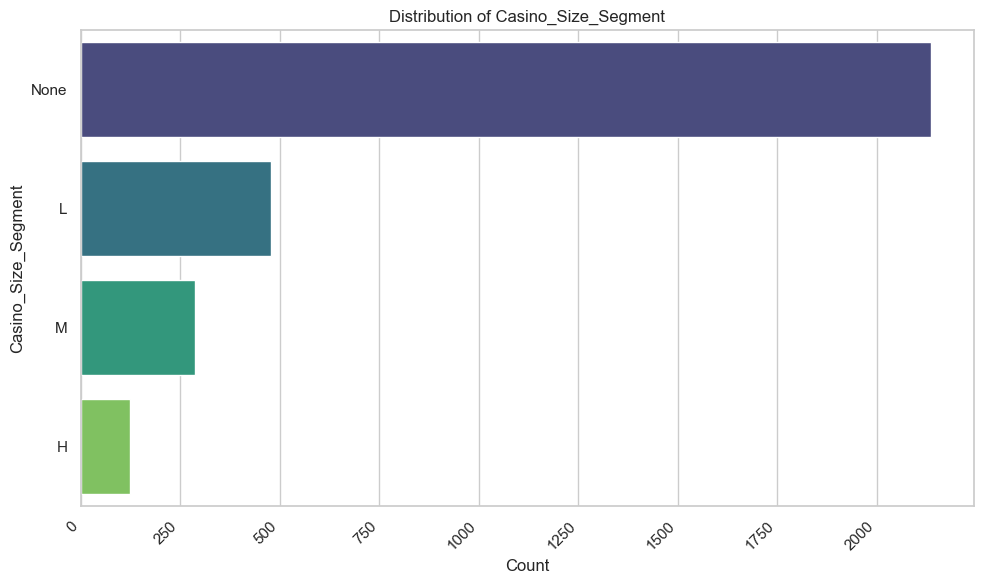

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


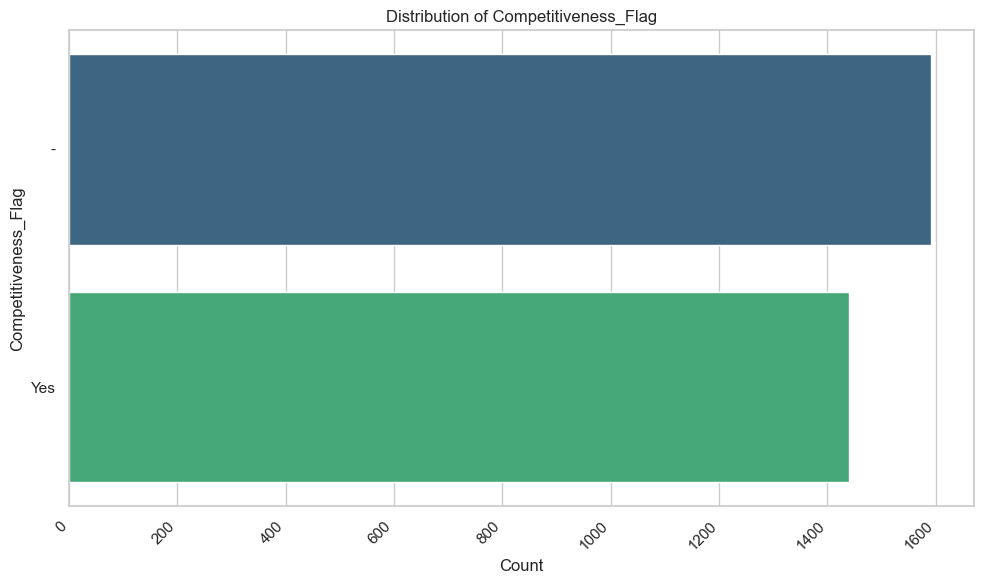

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


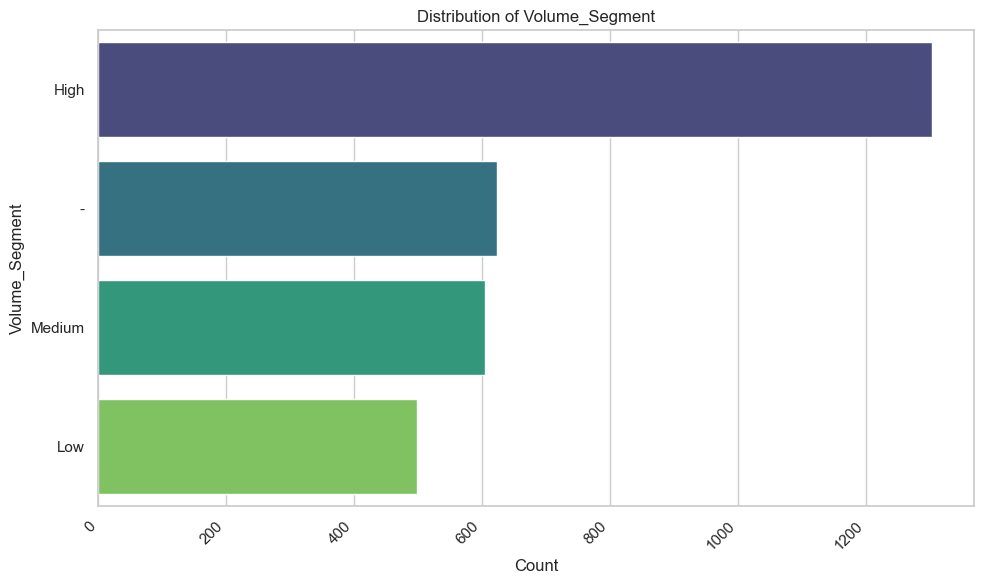

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


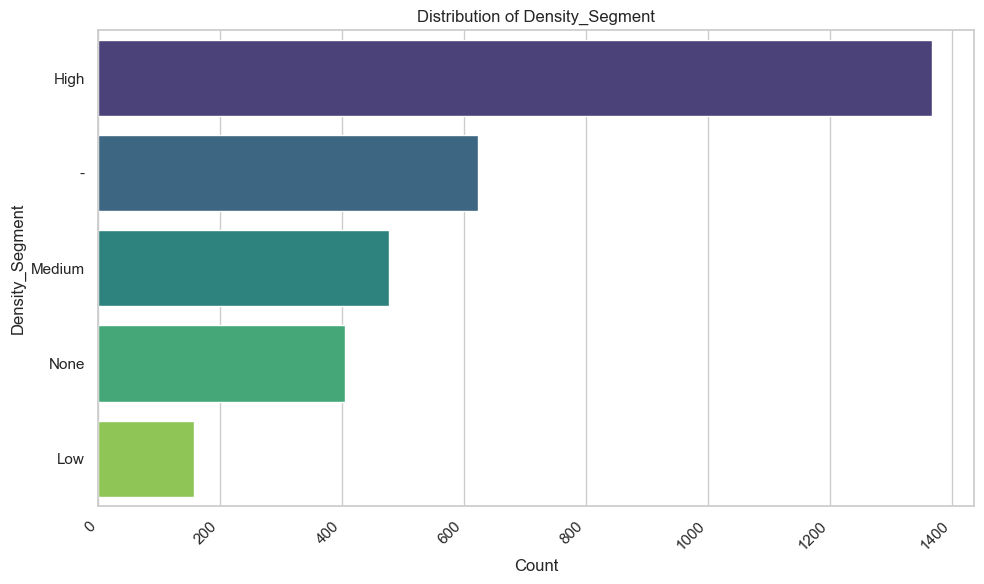

C:\Users\Achintye Kamra\AppData\Local\Temp\ipykernel_24484\3914116649.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col].astype(str), order=order, palette='viridis')


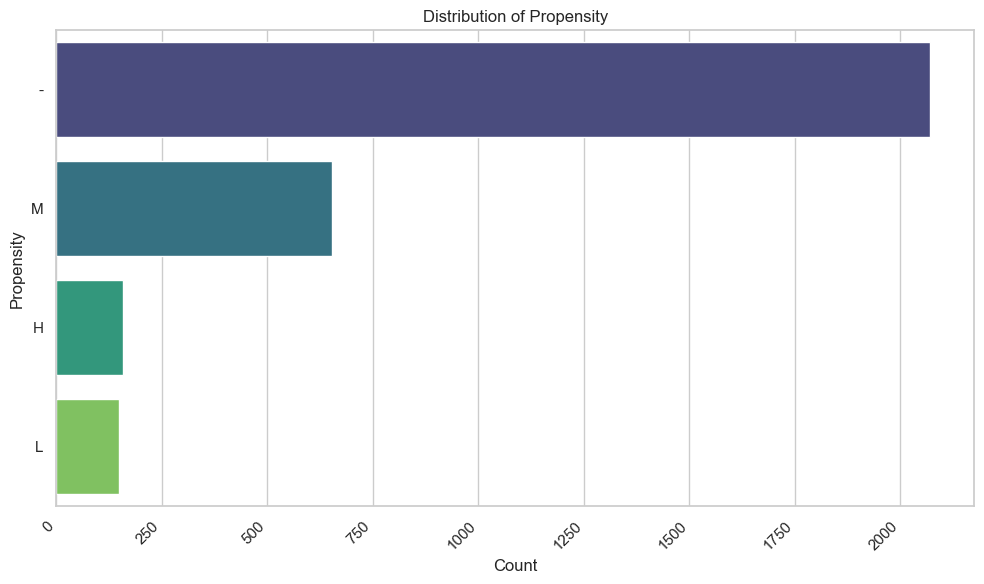

In [8]:
print("Distributions of Categorical Features:")
for col in actual_categorical_cols:
    if col in df.columns and df[col].isnull().sum() < len(df[col]):
        plt.figure(figsize=(10, 6))
        try:
            # Handle potential mixed types by converting to string for value_counts
            order = df[col].astype(str).value_counts().index
            sns.countplot(y=df[col].astype(str), order=order, palette='viridis')
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'{col}_distribution_plot.png'))
            plt.show()
        except Exception as e:
            print(f"Could not plot distribution for {col}: {e}")

In [12]:
df['EA_Segment'].unique()

array(['None', None, 'Early Adopter', 'Late Adopter', 'Trend Follower'],
      dtype=object)

In [16]:
df.sample(5)

,Customer_ID,Street,City,State_Code,Postal_Code,Country,Seasonality_Segment,EA_Segment,Revenue_Bucket,Profit_Bucket,Market_Share_Segment,Casino_Size_Segment,Market_Potential_Segment,Churn_Segment,Competitiveness_Flag,Volume_Segment,Density_Segment,Propensity
1207,Accoount 1208,70 FOSTER DR SUITE 800,SAULT STE MARIE,ON,P6A 6V2,CAN,None,None,L,H,None,None,None,None,Yes,High,High,-
256,Accoount 257,"3655 Northwest 87th Avenue,",Doral,FL,33178,USA,None,None,None,None,None,None,None,None,Yes,High,High,-
2356,Accoount 2357,1790 South Park Drive,Broken Bow,OK,74728,USA,None,None,None,None,None,None,None,None,-,Low,High,L
175,Accoount 176,47 E CACTUS AVE,LAS VEGAS,NV,89183,USA,None,None,None,None,None,None,None,None,Yes,High,High,-
211,Accoount 212,12901 NORTH HIGHWAY 77,NEWKIRK,OK,74647,USA,Potentially Seasonal,Trend Follower,L,H,None,None,None,Minimal Change,-,Medium,Medium,L
